In [6]:
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

In [4]:
data = []
with open('iris.data', 'r') as f:
   for line in f:
       if line.strip():
           item = line.strip().split(",")
           data.append( ([float(val) for val in item[:-1]], item[-1]) )
species = {s: i for i, s in enumerate(set(d[1] for d in data))}
data = [(d[0], species[d[1]]) for d in data]

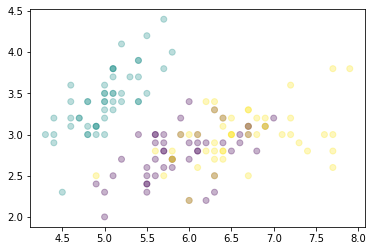

In [7]:
plt.scatter([d[0][0] for d in data],
            [d[0][1] for d in data], c=[d[1] for d in data], alpha=0.3)
plt.show()

In [8]:
## train data와 test data로 분리
random.shuffle(data)
train = data[:-30]
test = data[-30:]

In [10]:
## 거리구하는 함수 정의
def distance(a, b): 
  s= 0
  for i in range(len(a[0])):
      s += (a[0][i] - b[0][i]) ** 2
  return s ** 0.5

In [11]:
def knn_classify(k, query, train):
  knns = sorted((distance(point, query), point) for point in train)[:k]
  # 거리에따라 가중치를 주어 점수 계산 
  scores = {}
  for dist, point in knns:
       scores[point[1]] = scores.get(point[1], 0) + 1/(1+dist)

  resp, score = max(scores.items(), key=lambda x: x[1])
  
  return resp

In [13]:
## test
k= 3
correct = sum(1 for t in test if knn_classify(k, t, train) == t[1]) 
accuracy = correct/len(test)
print("accuracy:", accuracy)

accuracy: 1.0


100%|██████████| 100/100 [00:14<00:00,  6.72it/s]


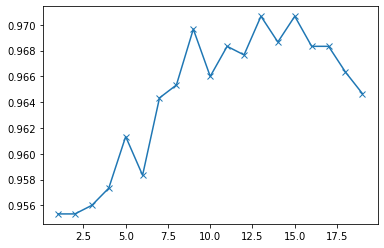

In [14]:
## find optimal k
num_trials = 100
train_size = int(len(data) * 0.8)
test_size = len(data) - train_size
corrects = [0]*20
for i in tqdm(range(num_trials)):
    random.shuffle(data)
    train = data[:train_size]
    test = data[train_size:]
    for k in range(1,20):
        corrects[k] += sum(1 for t in test if knn_classify(k, t, train) == t[1])
for k in range(1,20):
    corrects[k] /= num_trials * test_size
plt.plot(range(1,20), corrects[1:], '-x')
plt.show()